In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import display

def export(df: pd.DataFrame, path_no_dot: str, index=True):
    df.to_csv(f'exports/{path_no_dot}.csv', index=index)
    df.to_excel(f'exports/{path_no_dot}.xlsx', index=index)


# when 2023 singles is finishe, uncomment ###'s from this cell!

# data initialization
players = pd.read_csv('data/players.csv')
matches_2021_2s = pd.read_csv('data/matches_2021_2s.csv')
matches_2022_1s = pd.read_csv('data/matches_2022_1s.csv')
matches_2022_2s = pd.read_csv('data/matches_2022_2s.csv')
matches_2023_1s = pd.read_csv('data/matches_2023_1s.csv')

# data cleaning
players.index.name = "Players"
players.player = players.player.apply(str.strip)
# casting to ints!
players.replace(to_replace="None", value=0, inplace=True)
players['seed_2021_2s'] = players['seed_2021_2s'].apply(int)
players['seed_2022_1s'] = players['seed_2022_1s'].apply(int)
players['seed_2022_2s'] = players['seed_2022_2s'].apply(int)
players['seed_2023_1s'] = players['seed_2023_1s'].apply(int)
players.replace(to_replace=0, value=None, inplace=True)

# map seeds to matches
map_2021_2s = pd.Series(players['seed_2021_2s'].values, index=players['player']).dropna().to_dict()
matches_2021_2s['seed1'] = matches_2021_2s.t1p1.map(map_2021_2s)
matches_2021_2s['seed2'] = matches_2021_2s.t2p1.map(map_2021_2s)
map_2022_1s = pd.Series(players['seed_2022_1s'].values, index=players['player']).dropna().to_dict()
matches_2022_1s['seed1'] = matches_2022_1s.p1.map(map_2022_1s)
matches_2022_1s['seed2'] = matches_2022_1s.p2.map(map_2022_1s)
map_2022_2s = pd.Series(players['seed_2022_2s'].values, index=players['player']).dropna().to_dict()
matches_2022_2s['seed1'] = matches_2022_2s.t1p1.map(map_2022_2s)
matches_2022_2s['seed2'] = matches_2022_2s.t2p1.map(map_2022_2s)
map_2023_1s = pd.Series(players['seed_2023_1s'].values, index=players['player']).dropna().to_dict()
matches_2023_1s['seed1'] = matches_2023_1s.p1.map(map_2023_1s)
matches_2023_1s['seed2'] = matches_2023_1s.p2.map(map_2023_1s)

# create a cumulative singles matches table
matches_1s = pd.concat(
    [matches_2022_1s
    , matches_2023_1s]
    ).reset_index(drop=True)
matches_1s.index.name = "All Singles Matches"
# create a cumulative doubles matches table
matches_2s = pd.concat(
    [matches_2021_2s
    , matches_2022_2s]
    ).reset_index(drop=True)
matches_2s.index.name = "All Doubles Matches"

# cleaning singles matches and doubles mataches
matches_1s.p1 = matches_1s.p1.apply(str.strip)
matches_1s.p2 = matches_1s.p2.apply(str.strip)
matches_1s.seed1 = matches_1s.seed1.apply(int)
matches_1s.seed2 = matches_1s.seed2.apply(int)
matches_2s.t1p1 = matches_2s.t1p1.apply(str.strip)
matches_2s.t1p2 = matches_2s.t1p2.apply(str.strip)
matches_2s.t2p1 = matches_2s.t2p1.apply(str.strip)
matches_2s.t2p2 = matches_2s.t2p2.apply(str.strip)
matches_2s.seed1 = matches_2s.seed1.apply(int)
matches_2s.seed2 = matches_2s.seed2.apply(int)

# per-match total possible cups
matches_1s['tpc'] = matches_1s.apply(lambda row: max(row.score1, row.score2), axis=1)
matches_2s['tpc'] = matches_2s.apply(lambda row: max(row.score1, row.score2), axis=1)

# number of events played in 
players['num_events'] = players.iloc[:,["seed" == x[0:4] for x in players.columns]].count(axis=1)

# finding seed z_scores for each player
players['z_seed_2021_2'] = (players.seed_2021_2s.astype(float) - players.seed_2021_2s.astype(float).mean()) / players.seed_2021_2s.astype(float).std()
players['z_seed_2022_1'] = (players.seed_2022_1s.astype(float) - players.seed_2022_1s.astype(float).mean()) / players.seed_2022_1s.astype(float).std()
players['z_seed_2022_2'] = (players.seed_2022_2s.astype(float) - players.seed_2022_2s.astype(float).mean()) / players.seed_2022_2s.astype(float).std()
players['z_seed_2023_1'] = (players.seed_2023_1s.astype(float) - players.seed_2023_1s.astype(float).mean()) / players.seed_2023_1s.astype(float).std()

# negatives means you're typically seeded better than average, positives means you're typically seeded worse than average
players['avg_norm_seed'] = np.nanmean(players.loc[:,['z' in x for x in players.columns]].astype(float), axis=1)

# cell outputs
display(players)
display(matches_1s)
display(matches_2s)

,player,year_2023,seed_2021_2s,seed_2022_1s,seed_2022_2s,seed_2023_1s,num_events,z_seed_2021_2,z_seed_2022_1,z_seed_2022_2,z_seed_2023_1,avg_norm_seed
Players,,,,,,,,,,,,
0,Kristian Banlaoi,None,None,1,None,None,1,NaN,-1.565248,NaN,NaN,-1.565248
1,Kevin Cooper,4.0,2,2,2,None,3,-1.056443,-1.341641,-1.129159,NaN,-1.175748
2,Rohan Chowla,2.0,3,3,1,2,4,-0.633866,-1.118034,-1.505545,-1.421637,-1.169771
3,Rose Roché,4.0,1,4,3,None,3,-1.479020,-0.894427,-0.752773,NaN,-1.042073
4,Aaron Carter,4.0,1,5,3,8,4,-1.479020,-0.670820,-0.752773,-0.355409,-0.814506
5,Roman Ramirez,4.0,2,6,2,1,4,-1.056443,-0.447214,-1.129159,-1.599342,-1.058039
6,Coby Lovelace,4.0,4,7,6,9,4,-0.211289,-0.223607,0.376386,-0.177705,-0.059053
7,Paul Bartenfeld,4.0,6,8,9,19,4,0.633866,0.000000,1.505545,1.599342,0.934688
8,Jason Jackson,3.0,4,9,4,7,4,-0.211289,0.223607,-0.376386,-0.533114,-0.224296


,event,match_number,fe1,fe2,p1,p2,score1,score2,seed1,seed2,tpc
All Singles Matches,,,,,,,,,,,
0,2022_1s,1,False,False,Paul Bartenfeld,Jason Jackson,4,6,8,9,6
1,2022_1s,2,False,False,Rose Roché,Gabe Silverstein,5,6,4,13,6
2,2022_1s,3,False,False,Aaron Carter,Leah Baetcke,2,6,5,12,6
3,2022_1s,4,False,False,Kevin Cooper,Carla Betancourt,5,6,2,15,6
4,2022_1s,5,False,False,Coby Lovelace,Jack Massingill,5,6,7,10,6
...,...,...,...,...,...,...,...,...,...,...,...
61,2023_1s,33,True,True,Rohan Chowla,Aaron Carter,1,6,2,8,6
62,2023_1s,34,False,False,Nathan Snow,Levin Lee,4,6,12,3,6
63,2023_1s,35,True,True,Nathan Snow,Aaron Carter,7,9,12,8,9


,event,match_number,fe1,fe2,t1p1,t1p2,t2p1,t2p2,score1,score2,seed1,seed2,tpc
All Doubles Matches,,,,,,,,,,,,,
0,2021_2s,1,False,False,Rose Roché,Aaron Carter,Brian Tafazoli,Evan Sooklal,6,3,1,8,6
1,2021_2s,2,False,False,Coby Lovelace,Jason Jackson,Jack Massingill,Will Simpson,6,3,4,5,6
2,2021_2s,3,False,False,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,3,2,7,6
3,2021_2s,4,False,False,Rohan Chowla,Levin Lee,Paul Bartenfeld,Leah Baetcke,6,0,3,6,6
4,2021_2s,5,True,True,Brian Tafazoli,Evan Sooklal,Jack Massingill,Will Simpson,4,6,8,5,6
5,2021_2s,6,True,True,Ann Hall,Anna Brown,Paul Bartenfeld,Leah Baetcke,6,4,7,6,6
6,2021_2s,7,False,False,Rose Roché,Aaron Carter,Coby Lovelace,Jason Jackson,5,6,1,4,6
7,2021_2s,8,False,False,Kevin Cooper,Roman Ramirez,Rohan Chowla,Levin Lee,5,6,2,3,6
8,2021_2s,9,True,True,Kevin Cooper,Roman Ramirez,Ann Hall,Anna Brown,6,5,2,7,6


In [2]:
# # CUPS TABLE

# # initalization with every player
# cups_table = pd.DataFrame()
# cups_table['player'] = players.player
# cups_table.index.name = "Cups Table"

# # number of games played in singles
# list_games_played_1s = list()
# for name in players.player:
#     games_played_1s = 0
#     for i in range(len(matches_1s)):
#         if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
#             games_played_1s += 1
#     list_games_played_1s.append(games_played_1s)
# cups_table['GP_1s'] = list_games_played_1s

# # number of games played in doubles
# list_games_played_2s = list()
# for name in players.player:
#     games_played_2s = 0
#     for i in range(len(matches_2s)):
#         if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
#             games_played_2s += 1
#     list_games_played_2s.append(games_played_2s)
# cups_table['GP_2s'] = list_games_played_2s

# # per-match total possible cups
# matches_1s['tpc'] = matches_1s.apply(lambda row: max(row.score1, row.score2), axis=1)
# matches_2s['tpc'] = matches_2s.apply(lambda row: max(row.score1, row.score2), axis=1)

# # total number of cups scored in singles
# list_CS_1s = list()
# for name in players.player:
#     CS_1s = 0
#     for i in range(len(matches_1s)):
#         if name == matches_1s.loc[i, "p1"]:
#             CS_1s += matches_1s.loc[i, 'score1']
#         if name == matches_1s.loc[i, "p2"]:
#             CS_1s += matches_1s.loc[i, 'score2']
#     list_CS_1s.append(CS_1s)
# cups_table['CS_1s'] = list_CS_1s

# # total number of cups available in singles
# list_CA_1s = list()
# for name in players.player:
#     CA_1s = 0
#     for i in range(len(matches_1s)):
#         if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
#             CA_1s += matches_1s.loc[i, 'tpc']
#     list_CA_1s.append(CA_1s)
# cups_table['CA_1s'] = list_CA_1s

# # total number of cups scored in doubles (weighted by 0.5)
# list_CS_2s = list()
# for name in players.player:
#     CS_2s = 0
#     for i in range(len(matches_2s)):
#         if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
#             CS_2s += matches_2s.loc[i, 'score1'] / 2
#         if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
#             CS_2s += matches_2s.loc[i, 'score2'] / 2
#     list_CS_2s.append(CS_2s)
# cups_table['CS_2s'] = list_CS_2s

# # total number of cups availabe in doubles
# list_CA_2s = list()
# for name in players.player:
#     CA_2s = 0
#     for i in range(len(matches_2s)):
#         if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
#             CA_2s += matches_2s.loc[i, 'tpc'] / 2
#     list_CA_2s.append(CA_2s)
# cups_table['CA_2s'] = list_CA_2s

# # cups scored per game in singles
# cups_table['CS/GP_1s'] = cups_table.CS_1s / cups_table.GP_1s

# # cups scored per game in doubles (weighted by 0.5)
# cups_table['CS/GP_2s'] = cups_table.CS_2s / cups_table.GP_2s


# # per-player percent cups hit, both singles and doubles (weighted by 0.5)
# # THIS IS THE METRIC TO DETERMINE PAST PERFORMANCE, AND POTENTIAL SEEDING, favors efficiency regardless of participation
# cups_table['PCT_CS'] = cups_table.apply(lambda row: (row.CS_1s + row.CS_2s) / (row.CA_1s + row.CA_2s) * 100, axis=1)
# # cups_table['rank_PCT_CS'] = cups_table.PCT_CS.rank(ascending=False).apply(int)

# display(cups_table.sort_values('PCT_CS', ascending=False).reset_index(drop=True))

In [3]:

## FA DIFFERENTIAL TABLE

fa_table = pd.DataFrame()
fa_table['player'] = players.player
fa_table.index.name = "Cup Points Table"

# number of games played in singles
list_games_played_1s = list()
for name in players.player:
    games_played_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            games_played_1s += 1
    list_games_played_1s.append(games_played_1s)
fa_table['GP_1s'] = list_games_played_1s


# pf_1s: 'points for' player
# pa_1s: 'points against' player
# +/-_1s: 'net differential' player
list_pf_1s = list()
list_pa_1s = list()
for name in players.player:
    pf_1s = 0
    pa_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            pf_1s += matches_1s.loc[i, "score1"]
            pa_1s += matches_1s.loc[i, "score2"]
        if name == matches_1s.loc[i, "p2"]:
            pf_1s += matches_1s.loc[i, "score2"]
            pa_1s += matches_1s.loc[i, "score1"]
            
    list_pf_1s.append(pf_1s)
    list_pa_1s.append(pa_1s)

fa_table['PF_1s'] = list_pf_1s
fa_table['PA_1s'] = list_pa_1s

# total number of cups available in singles
list_CA_1s = list()
for name in players.player:
    CA_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            CA_1s += matches_1s.loc[i, 'tpc']
    list_CA_1s.append(CA_1s)
fa_table['CA_1s'] = list_CA_1s

fa_table['+/-_1s'] = fa_table['PF_1s'] - fa_table['PA_1s']

# score differential in doubles (weighted by 0.5 or weighted by 1.0) idk!


# number of games played in doubles
list_games_played_2s = list()
for name in players.player:
    games_played_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            games_played_2s += 1
    list_games_played_2s.append(games_played_2s)
fa_table['GP_2s'] = list_games_played_2s

# pf_2s: 'points for' player
# pa_2s: 'points against' player
# +/-_2s: 'net differential' player
list_pf_2s = list()
list_pa_2s = list()
for name in players.player:
    pf_2s = 0
    pa_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            pf_2s += matches_2s.loc[i, "score1"] # * 0.5
            pa_2s += matches_2s.loc[i, "score2"] # * 0.5
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            pf_2s += matches_2s.loc[i, "score2"] # * 0.5
            pa_2s += matches_2s.loc[i, "score1"] # * 0.5
            
    list_pf_2s.append(pf_2s)
    list_pa_2s.append(pa_2s)

weight = 1

fa_table['PF_2s'] = [x * weight for x in list_pf_2s]
fa_table['PA_2s'] = [x * weight for x in list_pa_2s]

# total number of cups availabe in doubles
list_CA_2s = list()
for name in players.player:
    CA_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            CA_2s += matches_2s.loc[i, 'tpc'] # / 2
    list_CA_2s.append(CA_2s)
fa_table['CA_2s'] = list_CA_2s

fa_table['+/-_2s'] = fa_table['PF_2s'] - fa_table['PA_2s']

# cummulative
fa_table['GP'] = fa_table.GP_1s + fa_table.GP_2s
fa_table['PF'] = fa_table.PF_1s + fa_table.PF_2s
fa_table['PA'] = fa_table.PA_1s + fa_table.PA_2s
fa_table['CA'] = fa_table.CA_1s + fa_table.CA_2s
fa_table['+/-'] = fa_table.PF - fa_table.PA

# per game
fa_table['PF/G'] = fa_table['PF'] / fa_table['GP']
fa_table['PA/G'] = fa_table['PA'] / fa_table['GP']
fa_table['CA/G'] = fa_table['CA'] / fa_table['GP']
fa_table['+/-/G'] = fa_table['+/-'] / fa_table['GP']

# dominance
fa_table['PF/PA'] = fa_table.apply(lambda row: (row.PF_1s + row.PF_2s) / (row.PA_1s + row.PA_2s) * 100, axis=1)
# efficiency v1
fa_table['PF/CA'] = fa_table.apply(lambda row: (row.PF_1s + row.PF_2s) / (row.CA_1s + row.CA_2s) * 100, axis=1)
# efficiency
fa_table['(+/-)/CA'] = fa_table.apply(lambda row: ((row.PF_1s + row.PF_2s) - (row.PA_1s + row.PA_2s)) / (row.CA_1s + row.CA_2s), axis=1)

with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(fa_table.sort_values('(+/-)/CA', ascending=False).reset_index(drop=True))

,player,GP_1s,PF_1s,PA_1s,CA_1s,+/-_1s,GP_2s,PF_2s,PA_2s,CA_2s,+/-_2s,GP,PF,PA,CA,+/-,PF/G,PA/G,CA/G,+/-/G,PF/PA,PF/CA,(+/-)/CA
0,Levin Lee,6,31,26,36,5,11,68,50,72,18,17,99,76,108,23,5.823529,4.470588,6.352941,1.352941,130.263158,91.666667,0.212963
1,Roman Ramirez,11,71,54,75,17,10,53,49,60,4,21,124,103,135,21,5.904762,4.904762,6.428571,1.000000,120.388350,91.851852,0.155556
2,Aaron Carter,11,65,52,72,13,7,38,38,45,0,18,103,90,117,13,5.722222,5.000000,6.500000,0.722222,114.444444,88.034188,0.111111
3,Rohan Chowla,11,66,70,81,-4,11,68,50,72,18,22,134,120,153,14,6.090909,5.454545,6.954545,0.636364,111.666667,87.581699,0.091503
4,Kevin Cooper,5,26,22,30,4,10,53,49,60,4,15,79,71,90,8,5.266667,4.733333,6.000000,0.533333,111.267606,87.777778,0.088889
5,Nathan Snow,5,29,27,33,2,0,0,0,0,0,5,29,27,33,2,5.800000,5.400000,6.600000,0.400000,107.407407,87.878788,0.060606
6,Kristian Banlaoi,3,16,15,18,1,0,0,0,0,0,3,16,15,18,1,5.333333,5.000000,6.000000,0.333333,106.666667,88.888889,0.055556
7,Coby Lovelace,6,35,34,39,1,8,48,44,54,4,14,83,78,93,5,5.928571,5.571429,6.642857,0.357143,106.410256,89.247312,0.053763
8,Will Simpson,5,29,28,33,1,8,39,40,48,-1,13,68,68,81,0,5.230769,5.230769,6.230769,0.000000,100.000000,83.950617,0.000000
9,Jack Massingill,6,29,33,36,-4,9,47,43,54,4,15,76,76,90,0,5.066667,5.066667,6.000000,0.000000,100.000000,84.444444,0.000000


In [4]:
# WIN-LOSS TABLE: favors winners and those with greater participation
# W = UW + EW
# L = UL + EL
# RL = URL + ERL

wl_table = pd.DataFrame()
wl_table['player'] = players.player
wl_table['year_2023'] = players.year_2023
wl_table.index.name = "All Records Table"

# wins in singles
list_W_1s = list()
list_UW_1s = list()
list_EW_1s = list()
for name in players.player:
    W_1s = 0
    UW_1s = 0
    EW_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                W_1s += 1
                if matches_1s.loc[i, 'fe1']:
                    EW_1s += 1
                else:
                    UW_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                W_1s += 1
                if matches_1s.loc[i, 'fe2']:
                    EW_1s += 1
                else:
                    UW_1s += 1
    list_W_1s.append(W_1s)
    list_UW_1s.append(UW_1s)
    list_EW_1s.append(EW_1s)
wl_table['W_1s'] = list_W_1s
wl_table['UW_1s'] = list_UW_1s
wl_table['EW_1s'] = list_EW_1s

# regular-time losses in singles
list_L_1s = list()
list_UL_1s = list()
list_EL_1s = list()
for name in players.player:
    L_1s = 0
    UL_1s = 0
    EL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] == 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    L_1s += 1
                    if matches_1s.loc[i, 'fe1']:
                        EL_1s += 1
                    else:
                        UL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    L_1s += 1
                    if matches_1s.loc[i, 'fe2']:
                        EL_1s += 1
                    else:
                        UL_1s += 1
    list_L_1s.append(L_1s)
    list_UL_1s.append(UL_1s)
    list_EL_1s.append(EL_1s)
wl_table['L_1s'] = list_L_1s
wl_table['UL_1s'] = list_UL_1s
wl_table['EL_1s'] = list_EL_1s

# overtime losses in singles
list_RL_1s = list()
list_URL_1s = list()
list_ERL_1s = list()
for name in players.player:
    RL_1s = 0
    URL_1s = 0
    ERL_1s = 0
    for i in range(len(matches_1s)):
        if matches_1s.loc[i, "tpc"] > 6:
            if name == matches_1s.loc[i, "p1"]:
                if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                    RL_1s += 1
                    if matches_1s.loc[i, 'fe1']:
                        ERL_1s += 1
                    else:
                        URL_1s += 1
            if name == matches_1s.loc[i, "p2"]:
                if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                    RL_1s += 1
                    if matches_1s.loc[i, 'fe2']:
                        ERL_1s += 1
                    else:
                        URL_1s += 1
    list_RL_1s.append(RL_1s)
    list_URL_1s.append(URL_1s)
    list_ERL_1s.append(ERL_1s)
wl_table['RL_1s'] = list_RL_1s
wl_table['URL_1s'] = list_URL_1s
wl_table['ERL_1s'] = list_ERL_1s

# wins in doubles
list_W_2s = list()
list_UW_2s = list()
list_EW_2s = list()
for name in players.player:
    W_2s = 0
    UW_2s = 0
    EW_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                W_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    EW_2s += 1
                else:
                    UW_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                W_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    EW_2s += 1
                else:
                    UW_2s += 1
    list_W_2s.append(W_2s)
    list_UW_2s.append(UW_2s)
    list_EW_2s.append(EW_2s)
wl_table['W_2s'] = list_W_2s
wl_table['UW_2s'] = list_UW_2s
wl_table['EW_2s'] = list_EW_2s

# regular-time losses in doubles
list_L_2s = list()
list_UL_2s = list()
list_EL_2s = list()
for name in players.player:
    L_2s = 0
    UL_2s = 0
    EL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] == 6):
                L_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    EL_2s += 1
                else:
                    UL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] == 6):
                L_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    EL_2s += 1
                else:
                    UL_2s += 1
    list_L_2s.append(L_2s)
    list_UL_2s.append(UL_2s)
    list_EL_2s.append(EL_2s)
wl_table['L_2s'] = list_L_2s
wl_table['UL_2s'] = list_UL_2s
wl_table['EL_2s'] = list_EL_2s

# overtime losses in doubles
list_RL_2s = list()
list_URL_2s = list()
list_ERL_2s = list()
for name in players.player:
    RL_2s = 0
    URL_2s = 0
    ERL_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if (matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score2"] > 6):
                RL_2s += 1
                if matches_2s.loc[i, 'fe1']:
                    ERL_2s += 1
                else:
                    URL_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if (matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]) and (matches_2s.loc[i, "score1"] > 6):
                RL_2s += 1
                if matches_2s.loc[i, 'fe2']:
                    ERL_2s += 1
                else:
                    URL_2s += 1
    list_RL_2s.append(RL_2s)
    list_URL_2s.append(URL_2s)
    list_ERL_2s.append(ERL_2s)
wl_table['RL_2s'] = list_RL_2s
wl_table['URL_2s'] = list_URL_2s
wl_table['ERL_2s'] = list_ERL_2s

wl_table['UW'] = wl_table.UW_1s + wl_table.UW_2s
wl_table['EW'] = wl_table.EW_1s + wl_table.EW_2s
wl_table['UL'] = wl_table.UL_1s + wl_table.UL_2s
wl_table['EL'] = wl_table.EL_1s + wl_table.EL_2s
wl_table['URL'] = wl_table.URL_1s + wl_table.URL_2s
wl_table['ERL'] = wl_table.ERL_1s + wl_table.ERL_2s

wl_table['GP'] = fa_table.GP_1s + fa_table.GP_2s
wl_table['UGP'] = wl_table.UW + wl_table.UL + wl_table.URL
wl_table['EGP'] = wl_table.EW + wl_table.EL + wl_table.ERL


# win-loss as overdogs
# overdog win, underdog win, overdog loss, underdog loss
list_ODW = list()
list_UDW = list()
list_ODL = list()
list_UDL = list()
list_ODRL = list()
list_UDRL = list()

for name in players.player:

    ODW = 0
    UDW = 0
    ODL = 0
    UDL = 0
    ODRL = 0
    UDRL = 0

    for (i, row) in matches_1s.iterrows():
        if any([name == x for x in [row.p1]]):
            if row.seed1 < row.seed2:
                if row.score1 > row.score2:
                    ODW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    UDW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            else:
                raise Exception("calculation error: tie seed!")
        
        # I'm on team 2
        elif any([name == x for x in [row.p2]]):
            # I have a higher/worse seed
            if row.seed1 < row.seed2:
                # I lost
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    UDW += 1
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    ODW += 1
                else:
                    raise Exception("calculation error: tie score!")
            else:
                print(row.seed1)
                raise Exception("calculation error: tie seed!")

    for (i, row) in matches_2s.iterrows():
        if any([name == x for x in [row.t1p1, row.t1p2]]):
            if row.seed1 < row.seed2:
                if row.score1 > row.score2:
                    ODW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    UDW += 1
                elif row.score1 < row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                else:
                    raise Exception("calculation error: tie score!")
            else:
                raise Exception("calculation error: tie seed!")
        
        # I'm on team 2
        elif any([name == x for x in [row.t2p1, row.t2p2]]):
            # I have a higher/worse seed
            if row.seed1 < row.seed2:
                # I lost
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        UDRL += 1
                    elif row.tpc == 6:
                        UDL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    UDW += 1
                else:
                    raise Exception("calculation error: tie score!")
            elif row.seed1 > row.seed2:
                if row.score1 > row.score2:
                    if row.tpc > 6:
                        ODRL += 1
                    elif row.tpc == 6:
                        ODL += 1
                    else:
                        raise Exception("calculation error: tpc < 6")
                elif row.score1 < row.score2:
                    ODW += 1
                else:
                    raise Exception("calculation error: tie score!")
            else:
                print(row.seed1)
                raise Exception("calculation error: tie seed!")
  
    list_ODW.append(ODW)
    list_UDW.append(UDW)
    list_ODL.append(ODL)
    list_UDL.append(UDL)
    list_ODRL.append(ODRL)
    list_UDRL.append(UDRL)

wl_table['ODW'] = list_ODW
wl_table['ODL'] = list_ODL
wl_table['ODRL'] = list_ODRL
wl_table['UDW'] = list_UDW
wl_table['UDL'] = list_UDL
wl_table['UDRL'] = list_UDRL

# total wins (2 points)
wl_table['W'] = wl_table.W_1s + wl_table.W_2s

# total losses (0 points)
wl_table['L'] = wl_table.L_1s + wl_table.L_2s

# total overtime lossess (1 point)
wl_table['RL'] = wl_table.RL_1s + wl_table.RL_2s

# total points
wl_table['PTS'] = (wl_table.UW * 2) + (wl_table.EW * 1) + (wl_table.L * 0) + (wl_table.RL * 1)
wl_table['PTS/EV'] = wl_table.PTS / players.num_events

# win percentages
wl_table['W_PCT'] = (wl_table.W) / (wl_table.GP) * 100
wl_table['UW_PCT'] = (wl_table.UW) / (wl_table.UGP) * 100
wl_table['EW_PCT'] = (wl_table.EW) / (wl_table.EGP) * 100

# cell outputs
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(wl_table.sort_values('PTS', ascending=False).reset_index(drop=True))

,player,year_2023,W_1s,UW_1s,EW_1s,L_1s,UL_1s,EL_1s,RL_1s,URL_1s,ERL_1s,W_2s,UW_2s,EW_2s,L_2s,UL_2s,EL_2s,RL_2s,URL_2s,ERL_2s,UW,EW,UL,EL,URL,ERL,GP,UGP,EGP,ODW,ODL,ODRL,UDW,UDL,UDRL,W,L,RL,PTS,PTS/EV,W_PCT,UW_PCT,EW_PCT
0,Rohan Chowla,2.0,7,6,1,3,1,2,1,0,1,8,4,4,3,2,1,0,0,0,10,5,3,3,0,1,22,13,9,13,6,1,2,0,0,15,6,1,26,6.500000,68.181818,76.923077,55.555556
1,Roman Ramirez,4.0,8,2,6,2,1,1,1,1,0,7,4,3,3,2,1,0,0,0,6,9,3,2,1,0,21,10,11,10,4,0,5,1,1,15,5,1,22,5.500000,71.428571,60.000000,81.818182
2,Levin Lee,2.0,4,4,0,2,1,1,0,0,0,8,4,4,3,2,1,0,0,0,8,4,3,2,0,0,17,11,6,9,5,0,3,0,0,12,5,0,20,6.666667,70.588235,72.727273,66.666667
3,Aaron Carter,4.0,8,2,6,3,2,1,0,0,0,3,1,2,4,2,2,0,0,0,3,8,4,3,0,0,18,7,11,7,7,0,4,0,0,11,7,0,14,3.500000,61.111111,42.857143,72.727273
4,Coby Lovelace,4.0,3,0,3,2,1,1,1,1,0,5,4,1,2,1,1,1,0,1,4,4,2,2,1,1,14,7,7,3,1,0,5,3,2,8,4,2,14,3.500000,57.142857,57.142857,57.142857
5,Kevin Cooper,4.0,3,0,3,2,1,1,0,0,0,7,4,3,3,2,1,0,0,0,4,6,3,2,0,0,15,7,8,8,4,0,2,1,0,10,5,0,14,4.666667,66.666667,57.142857,75.000000
6,Leah Baetcke,4.0,5,4,1,2,1,1,1,1,0,0,0,0,3,2,1,1,0,1,4,1,3,2,1,1,12,8,4,2,1,0,3,4,2,5,5,2,11,2.750000,41.666667,50.000000,25.000000
7,Jason Jackson,3.0,1,1,0,3,2,1,1,0,1,4,3,1,2,1,1,1,0,1,4,1,3,2,0,2,12,7,5,2,4,1,3,1,1,5,5,2,11,2.750000,41.666667,57.142857,20.000000
8,Jack Massingill,3.0,2,1,1,4,2,2,0,0,0,5,1,4,4,2,2,0,0,0,2,5,4,4,0,0,15,6,9,2,3,0,5,5,0,7,8,0,9,2.250000,46.666667,33.333333,55.555556
9,Will Simpson,4.0,2,1,1,2,0,2,1,1,0,4,1,3,4,2,2,0,0,0,2,4,2,4,1,0,13,5,8,1,0,0,5,6,1,6,6,1,9,3.000000,46.153846,40.000000,50.000000


In [5]:
seed_rec_export = wl_table.loc[:, ['year_2023', 'PTS/EV', 'W_PCT']].set_index(wl_table.player).sort_values(['year_2023', 'PTS/EV', 'W_PCT'], ascending=[False, False, False])
display(seed_rec_export)

export(seed_rec_export, 'shorts/seed_rec_export')

,year_2023,PTS/EV,W_PCT
player,,,
Roman Ramirez,4.0,5.500000,71.428571
Carla Betancourt,4.0,5.000000,60.000000
Kevin Cooper,4.0,4.666667,66.666667
Aaron Carter,4.0,3.500000,61.111111
Coby Lovelace,4.0,3.500000,57.142857
Will Simpson,4.0,3.000000,46.153846
Leah Baetcke,4.0,2.750000,41.666667
Ann Hall,4.0,1.666667,40.000000
Rose Roché,4.0,1.333333,33.333333


In [6]:
# standard win-loss table
wl_export = wl_table.loc[:, ['W', 'L', 'RL', 'PTS']].set_index(wl_table.player).sort_values(['PTS', 'W', 'RL', 'L'], ascending=[False, False, False, True])
display(wl_export)

# underdog overdog table
dog_export = wl_table.loc[:, ['ODW', 'ODL', 'ODRL', 'UDW', 'UDL', 'UDRL']].set_index(wl_table.player).sort_values(['UDW', 'UDRL', 'UDL'], ascending=[False, False, True])
display(dog_export)

# facing elimination table
elim_export = wl_table.loc[:, ['UW', 'UL', 'URL', 'EW', 'EL', 'ERL']].set_index(wl_table.player).sort_values(['EW', 'EL', 'ERL'], ascending=[False, False, True])
display(elim_export)

ewrl_export = wl_table.loc[:, ['UW', 'EW', 'L', 'RL', 'PTS']].set_index(wl_table.player).sort_values(['PTS', 'UW', 'EW', 'RL', 'L'], ascending=[False, False, False, False, True])
display(ewrl_export)

export(wl_export, 'shorts/win-loss')
export(dog_export, 'shorts/dog')
export(elim_export, 'shorts/elim')
export(ewrl_export, 'shorts/ewrl')

,W,L,RL,PTS
player,,,,
Rohan Chowla,15,6,1,26
Roman Ramirez,15,5,1,22
Levin Lee,12,5,0,20
Aaron Carter,11,7,0,14
Kevin Cooper,10,5,0,14
Coby Lovelace,8,4,2,14
Jason Jackson,5,5,2,11
Leah Baetcke,5,5,2,11
Jack Massingill,7,8,0,9


,ODW,ODL,ODRL,UDW,UDL,UDRL
player,,,,,,
Coby Lovelace,3,1,0,5,3,2
Roman Ramirez,10,4,0,5,1,1
Will Simpson,1,0,0,5,6,1
Jack Massingill,2,3,0,5,5,0
Ann Hall,0,2,0,4,3,1
Aaron Carter,7,7,0,4,0,0
Gabe Silverstein,2,3,0,4,4,0
Yvonne Nguyen,0,0,0,4,4,0
Leah Baetcke,2,1,0,3,4,2


,UW,UL,URL,EW,EL,ERL
player,,,,,,
Roman Ramirez,6,3,1,9,2,0
Aaron Carter,3,4,0,8,3,0
Kevin Cooper,4,3,0,6,2,0
Jack Massingill,2,4,0,5,4,0
Rohan Chowla,10,3,0,5,3,1
Gabe Silverstein,2,3,0,4,4,0
Will Simpson,2,2,1,4,4,0
Levin Lee,8,3,0,4,2,0
Coby Lovelace,4,2,1,4,2,1


,UW,EW,L,RL,PTS
player,,,,,
Rohan Chowla,10,5,6,1,26
Roman Ramirez,6,9,5,1,22
Levin Lee,8,4,5,0,20
Kevin Cooper,4,6,5,0,14
Coby Lovelace,4,4,4,2,14
Aaron Carter,3,8,7,0,14
Jason Jackson,4,1,5,2,11
Leah Baetcke,4,1,5,2,11
Jack Massingill,2,5,8,0,9


In [7]:
# hypothetical consumed standards
hcs_table = pd.DataFrame()
hcs_table['player'] = players.player
hcs_table.index.name = "Hypothetical Consumed Standards Table"

# hypothetical consumed standards in singles
list_hcs_1s = list()
for name in players.player:
    hcs_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1", "p2"]]):
            hcs_1s += int((matches_1s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_1s.append(hcs_1s)
hcs_table['hcs_1s'] = list_hcs_1s

# hypothetical consumed standards in doubles
list_hcs_2s = list()
for name in players.player:
    hcs_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2", "t2p1", "t2p2"]]):
            hcs_2s += int((matches_2s.loc[i, 'tpc'] - 3) / 3)
    list_hcs_2s.append(hcs_2s)
hcs_table['hcs_2s'] = list_hcs_2s

# hypothetical consumed standards
hcs_table['hcs'] = hcs_table.hcs_1s + hcs_table.hcs_2s

# hypothetical consumed standards per event
hcs_table['hcs/event'] = hcs_table.hcs / players.num_events # (sum(["seed" == x[0:4] for x in players.columns]) - (players.iloc[:,["seed" == x[0:4] for x in players.columns]].isna().sum(axis=1)))

display(hcs_table.sort_values('hcs/event', ascending=False).reset_index(drop=True))

,player,hcs_1s,hcs_2s,hcs,hcs/event
0,Rohan Chowla,16,13,29,7.250000
1,Levin Lee,6,13,19,6.333333
2,Nathan Snow,6,0,6,6.000000
3,Roman Ramirez,14,10,24,6.000000
4,Aaron Carter,13,8,21,5.250000
5,Carla Betancourt,5,0,5,5.000000
6,Kevin Cooper,5,10,15,5.000000
7,Will Simpson,6,8,14,4.666667
8,Yvonne Nguyen,7,2,9,4.500000
9,Gabe Silverstein,8,5,13,4.333333


In [8]:
str_table = pd.DataFrame()
str_table['player'] = players.player
str_table.index.name = "Strength Table"

# strength of schedule (how difficult were the opposing seeds), sum the seeds of people's wins and losses
# this is independent of your own ranking

# total seeds in singles
list_total_seeds_1s = list()
for name in players.player:
    total_seeds_1s = 0
    for i in range(len(matches_1s)):
        if any([name == matches_1s.loc[i, x] for x in ["p1"]]):
            total_seeds_1s += matches_1s.loc[i, "seed2"] # - matches_1s.loc[i, "seed1"]
        if any([name == matches_1s.loc[i, x] for x in ["p2"]]):
            total_seeds_1s += matches_1s.loc[i, "seed1"] # - matches_1s.loc[i, "seed2"]
    list_total_seeds_1s.append(total_seeds_1s)
str_table['total_seeds_1s'] = list_total_seeds_1s

# total seeds in doubles
list_total_seeds_2s = list()
for name in players.player:
    total_seeds_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed2"] # - matches_2s.loc[i, "seed1"]
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            total_seeds_2s += matches_2s.loc[i, "seed1"] # - matches_2s.loc[i, "seed2"]
    list_total_seeds_2s.append(total_seeds_2s)
str_table['total_seeds_2s'] = list_total_seeds_2s
str_table['total_seeds'] = str_table.total_seeds_1s + str_table.total_seeds_2s

# average total seeds in singles by ratio to highest seed (norm) and by match (avg)
# this is a metric for how hard someone's journey or matchup was
    # lower numbers faced on average a harder opponent, whether they beat them or not
# seeds kinda broken, doesn't scale by highest seed of event
str_table['avg_norm_total_seeds_1s'] = str_table.total_seeds_1s / max(matches_1s.seed1) / fa_table.GP_1s

# average total seeds in doubles by ratio to highest seed (norm) and by match (avg)
str_table['avg_norm_total_seeds_2s'] = str_table.total_seeds_2s / max(matches_2s.seed1) / fa_table.GP_2s
str_table['total_seeds'] = str_table.total_seeds_1s + str_table.total_seeds_2s


# SOV metric
# the composite win percentage of all the teams you've beaten

map_player2wpct = dict(wl_table.loc[:, ["player", "W_PCT"]].dropna().to_dict('split')['data'])

# SOV in singles
list_SOV_1s = list()
for name in players.player:
    SOV_1s = 0
    n_1s = 0
    for i in range(len(matches_1s)):
        if name == matches_1s.loc[i, "p1"]:
            if matches_1s.loc[i, "score1"] > matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p2"]]
                n_1s += 1
        if name == matches_1s.loc[i, "p2"]:
            if matches_1s.loc[i, "score1"] < matches_1s.loc[i, "score2"]:
                SOV_1s += map_player2wpct[matches_1s.loc[i, "p1"]]
                n_1s +=1
    if n_1s == 0:
        list_SOV_1s.append(np.NaN)
    else:    
        list_SOV_1s.append(SOV_1s / n_1s)
str_table['SOV_1s'] = list_SOV_1s

# SOV in doubles
list_SOV_2s = list()
for name in players.player:
    SOV_2s = 0
    n_2s = 0
    for i in range(len(matches_2s)):
        if any([name == matches_2s.loc[i, x] for x in ["t1p1", "t1p2"]]):
            if matches_2s.loc[i, "score1"] > matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't2p1']] + map_player2wpct[matches_2s.loc[i, 't2p2']]) / 2
                n_2s += 1
        if any([name == matches_2s.loc[i, x] for x in ["t2p1", "t2p2"]]):
            if matches_2s.loc[i, "score1"] < matches_2s.loc[i, "score2"]:
                SOV_2s += (map_player2wpct[matches_2s.loc[i, 't1p1']] + map_player2wpct[matches_2s.loc[i, 't1p2']]) / 2
                n_2s += 1
    if n_2s == 0:
        list_SOV_2s.append(np.NaN)
    else:
        list_SOV_2s.append(SOV_2s / n_2s)
str_table['SOV_2s'] = list_SOV_2s

str_table['SOS'] = 1 - str_table[['avg_norm_total_seeds_1s', 'avg_norm_total_seeds_2s']].mean(axis=1)


# overall SOV
list_SOV = list()
for (i, row) in str_table.iterrows():
    if np.isnan(row.SOV_1s) and np.isnan(row.SOV_2s):
        list_SOV.append(0)
    elif np.isnan(row.SOV_1s):
        list_SOV.append(row.SOV_2s)
    elif np.isnan(row.SOV_2s):
        list_SOV.append(row.SOV_1s)
    else:
        list_SOV.append((row.SOV_1s + row.SOV_2s) / 2) 
str_table['SOV'] = [x/100 for x in list_SOV]

str_table['PTS'] = wl_table.PTS

str_table['z_SOS'] = stats.zscore(str_table.SOS)
str_table['z_SOV'] = stats.zscore(str_table.SOV)
str_table['z_PTS'] = stats.zscore(str_table.PTS)
str_table['z_PTS/EV'] = str_table['z_PTS'] / players.num_events

### OLD FORMULAS
# str_table['expectation'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / (1 - str_table.SOS)
# str_table['cinderella'] = str_table.SOS * str_table.SOV
# str_table['exceeds_expectations'] = (str_table.z_PTS) - stats.zscore(wl_table.GP)
# str_table['exceeds_expectations'] = (str_table.z_SOV) + stats.zscore(wl_table.GP)
# str_table['underrated'] = np.power(wl_table.PTS / max(wl_table.PTS), 1/4) / ((1 - str_table.SOV) * (1 - str_table.SOS))
###

# SOS: strength of seed, formula based on opponent seed
# SOV: strength of victory, formula based on opponent win percentage
# expectation, like exceeds-expectations: a really low assigned seed and (high strength of victory | high number of wins)
# cinderella: like how much do they exceed expectations

expectation_w = 1.3
str_table['avg_norm_seed'] = players.avg_norm_seed
str_table['PTS/EV'] = wl_table['PTS/EV']
str_table['n_avg_norm_seed'] = (players.avg_norm_seed / players.avg_norm_seed.apply(abs).max())
str_table['n_PTS/EV'] = (wl_table['PTS/EV'] / wl_table['PTS/EV'].apply(abs).max())

str_table['expectation'] = (players.avg_norm_seed / players.avg_norm_seed.apply(abs).max()) + (str_table['z_PTS/EV'] / str_table['z_PTS/EV'].apply(abs).max())
# str_table['expectation'] = (players.avg_norm_seed / players.avg_norm_seed.apply(abs).max()) + (wl_table['PTS/EV'] / wl_table['PTS/EV'].apply(abs).max())
# str_table['expectation'] = abs((players.avg_norm_seed / players.avg_norm_seed.apply(abs).max()) * (wl_table.PTS / wl_table.PTS.max()))
# str_table['expectation'] = (players.avg_norm_seed / expectation_w) + (str_table.z_PTS * expectation_w)

# ((matches_table['adjD_scores'] / score_seed_w) - (matches_table['adjD_seeds'] * score_seed_w))
# expectation_w = 0.5
# str_table['expectation'] = (players.avg_norm_seed * (expectation_w)) + (stats.zscore(wl_table.W) * (1 - expectation_w))
# str_table['cinderella'] = str_table.SOS + str_table.SOV
str_table['cinderella'] = (str_table.SOS / str_table.SOS.max()) + (str_table.SOV / str_table.SOV.max())

display(str_table.sort_values('expectation', ascending=False).reset_index(drop=True))

# plt.scatter(
#     x=str_table.PTS,
#     y=str_table.SOV,
#     s=200,
#     c=str_table.expectation,
#     cmap='rainbow'
#     )

# plt.title('expectation metric')
# plt.xlabel('points (PTS)')
# plt.ylabel('strength of victory (SOV)')
# plt.colorbar()

# plt.show()

# plt.scatter(
#     x=str_table.SOS,
#     y=str_table.SOV,
#     s=200,
#     c=str_table.cinderella,
#     cmap='rainbow'
#     )

# plt.title('cinderella metric')
# plt.xlabel('strength of seeds (SOS)')
# plt.ylabel('strength of victories (SOV)')
# plt.colorbar()

# plt.show()

# change RL to RL
# separate Ws worth 2 points and EW (elimination Ws worth 1 point)


,player,total_seeds_1s,total_seeds_2s,total_seeds,avg_norm_total_seeds_1s,avg_norm_total_seeds_2s,SOV_1s,SOV_2s,SOS,SOV,...,z_SOS,z_SOV,z_PTS,z_PTS/EV,avg_norm_seed,PTS/EV,n_avg_norm_seed,n_PTS/EV,expectation,cinderella
0,Yvonne Nguyen,59,11,70,0.578431,0.687500,31.130952,NaN,0.367034,0.311310,...,-0.845228,0.053885,-0.294823,-0.147412,1.463591,2.500000,0.935054,0.357143,0.790446,1.022041
1,Carla Betancourt,23,0,23,0.270588,NaN,60.000000,NaN,0.729412,0.600000,...,2.268731,1.611811,-0.294823,-0.294823,1.565248,5.000000,1.000000,0.714286,0.710784,2.000000
2,Ann Hall,73,15,88,0.858824,0.375000,22.222222,20.833333,0.383088,0.215278,...,-0.707275,-0.464352,-0.294823,-0.098274,0.958481,1.666667,0.612351,0.238095,0.515946,0.883998
3,Leah Baetcke,47,15,62,0.345588,0.468750,37.350427,NaN,0.592831,0.373504,...,1.095072,0.389521,0.574655,0.143664,0.392562,2.750000,0.250798,0.392857,0.391730,1.435259
4,Paul Bartenfeld,38,21,59,0.558824,0.656250,NaN,NaN,0.392463,0.000000,...,-0.626714,-1.626104,-1.019389,-0.254847,0.934688,0.000000,0.597150,0.000000,0.347150,0.538054
5,Nathan Snow,37,0,37,0.435294,NaN,46.866097,NaN,0.564706,0.468661,...,0.853390,0.903036,-0.004997,-0.004997,0.355409,7.000000,0.227063,1.000000,0.222161,1.555295
6,Will Simpson,31,29,60,0.364706,0.453125,43.910256,34.176587,0.591085,0.390434,...,1.080066,0.480884,0.284829,0.094943,0.195892,3.000000,0.125151,0.428571,0.218288,1.461082
7,Coby Lovelace,50,26,76,0.490196,0.406250,39.194139,50.500326,0.551777,0.448472,...,0.742291,0.794088,1.009395,0.252349,-0.059053,3.500000,-0.037728,0.500000,0.209821,1.503922
8,Evan Sooklal,20,6,26,0.588235,0.375000,NaN,NaN,0.518382,0.000000,...,0.455326,-1.626104,-1.019389,-0.509694,1.074920,0.000000,0.686741,0.000000,0.186741,0.710685
9,Noah Dale,0,14,14,NaN,0.583333,NaN,25.000000,0.416667,0.250000,...,-0.418731,-0.276973,-0.584649,-0.584649,1.129159,3.000000,0.721393,0.428571,0.147864,0.987903


In [9]:
import statsmodels.api as sm

In [10]:
# sickos metric: nebraska metric: good win differential, bad win percentage
# anti-nebraska metric: bad win differential, good win percentage (I think leah)
sickos_table = pd.DataFrame()
sickos_table['player'] = players.player
sickos_table.index.name = "Sickos Table"
sickos_table['+/-'] = fa_table['+/-']
sickos_table['W_PCT'] = wl_table['W_PCT']
sickos_table['z_+/-'] = stats.zscore(fa_table['+/-'])
sickos_table['z_W_PCT'] = (wl_table['W_PCT'] - 50) / 50

# sickos_table['sickos'] = sickos_table['z_+/-'] / sickos_table['z_W_PCT']
constant = sm.add_constant(sickos_table['z_W_PCT'])
model = sm.OLS(sickos_table['z_+/-'], constant).fit()
raw_sickos = - pd.Series(model.get_influence().resid_studentized_internal)
sickos_table['sickos_resids'] = - model.get_influence().resid_studentized_internal
sickos_table['sickos'] = sickos_table['sickos_resids']# .rank(ascending=True)

# sickos_table['sickos'] = - sickos_table['z_+/-'] + sickos_table['z_W_PCT']
# sickos_table['nebraska'] = abs(sickos_table['z_+/-']) / abs(sickos_table['z_W_PCT'])
# sickos_table['nebraska'] = ((fa_table['+/-'] / (max(fa_table['+/-']) - min(fa_table['+/-']))) / (wl_table['W_PCT'] / 100)).replace([-np.inf], [np.NaN])

# display(sickos_table.sort_values('anti-nebraska', ascending=False).reset_index(drop=True))

# plt.scatter(
#     x=fa_table['+/-'],
#     y=wl_table['W_PCT'],
#     s=200,
#     c=sickos_table['sickos'],
#     cmap='rainbow'
# )

# plt.title('sickos metric')
# plt.xlabel('cup differential (+/-)')
# plt.ylabel('win percentage (T_PCT)')
# plt.colorbar()

# plt.show()

# sickos metric: gustiness metric: good win percentage facing elimination games
sickos_table['EW'] = wl_table.EW
sickos_table['EL'] = wl_table.EL
sickos_table['EGP'] = wl_table.EGP
sickos_table['gutsiness'] = (wl_table.EW - wl_table.EL) / wl_table.EGP
# sickos_table['gutsiness'] = wl_table.EW_PCT / wl_table.EW_PCT.apply(abs).max()

raw_sickos_poll = pd.read_excel('data/20230212_sickos_poll.xlsx', sheet_name='stats')

for (i, row) in raw_sickos_poll.iterrows():
    if 'Kalah Roché' in row['player']:
        raw_sickos_poll.loc[i, 'player'] = 'Rose Roché'

poll_dict = dict(raw_sickos_poll[['player', 'Total Votes']].to_dict('split')['data'])
sickos_table['raw_poll_scores'] = sickos_table['player'].map(poll_dict)


display(sickos_table.sort_values('sickos', ascending=False).reset_index(drop=True))


,player,+/-,W_PCT,z_+/-,z_W_PCT,sickos_resids,sickos,EW,EL,EGP,gutsiness,raw_poll_scores
0,Carla Betancourt,-2,60.000000,-0.229416,0.200000,1.654005,1.654005,1,1,2,0.000000,22.0
1,Paul Bartenfeld,-20,0.000000,-2.294157,-1.000000,1.440292,1.440292,0,4,4,-1.000000,19.0
2,Yvonne Nguyen,-2,50.000000,-0.229416,0.000000,1.015127,1.015127,3,2,5,0.200000,8.0
3,Reagan Fryatt,-2,50.000000,-0.229416,0.000000,1.015127,1.015127,2,1,3,0.333333,1.0
4,Nathan Snow,2,60.000000,0.229416,0.200000,0.880848,0.880848,0,0,1,0.000000,NaN
5,Jason Jackson,-4,41.666667,-0.458831,-0.166667,0.877565,0.877565,1,2,5,-0.200000,12.0
6,Leah Baetcke,-3,41.666667,-0.344124,-0.166667,0.687280,0.687280,1,2,4,-0.250000,32.0
7,Cason Duszak,-2,42.857143,-0.229416,-0.142857,0.570585,0.570585,1,2,3,-0.333333,2.0
8,Helen Dunn,-5,33.333333,-0.573539,-0.333333,0.554425,0.554425,0,0,1,0.000000,13.0
9,Noah Dale,-5,33.333333,-0.573539,-0.333333,0.554425,0.554425,0,0,1,0.000000,4.0


In [11]:
# top 5 crazy matches, top 5 biggest upsets
# given the two players "win"

matches_table = pd.DataFrame()
matches_table = matches_1s.copy()
matches_table.index.name = "All Matches Table"
matches_table.insert(5, "t1p2", [None for _ in range(matches_1s.shape[0])])
matches_table.insert(7, "t2p2", [None for _ in range(matches_1s.shape[0])])
matches_table.rename(columns={'p1': 't1p1', 'p2': 't2p1'}, inplace=True)

matches_table = pd.concat([matches_table, matches_2s]).reset_index(drop=True)


# team_W_pct

player_2_W_PCT = pd.Series(wl_table['W_PCT'].values, index=players.player).to_dict()

list_t1_W_PCT = list()
list_t2_W_PCT = list()
for (i, match) in matches_table.iterrows():
    t1_W_PCT = list()
    t2_W_PCT = list()

    t1_W_PCT.append(player_2_W_PCT[match.t1p1])
    t2_W_PCT.append(player_2_W_PCT[match.t2p1])

    # if doubles
    if '2s' in match.event:
        t1_W_PCT.append(player_2_W_PCT[match.t1p2])
        t2_W_PCT.append(player_2_W_PCT[match.t2p2])

    list_t1_W_PCT.append(np.mean(t1_W_PCT))
    list_t2_W_PCT.append(np.mean(t2_W_PCT))
# matches_table['t1_W_PCT'] = list_t1_W_PCT
# matches_table['t2_W_PCT'] = list_t2_W_PCT

matches_table['D_seeds'] = -(matches_table['seed2'] - matches_table['seed1']) # negated to show that positive favors right side, negative favors left side

# adjusted seeds: we need to adjust for the fact that doubles ranges from 1-8 while singles ranges from 1-15
list_adjD_seeds = list()
for (i, match) in matches_table.iterrows():
    adjD_seeds = 0

    # hard-coded because I'm lazy
    if '2021_2s' in match.event:
        adjD_seeds = match.D_seeds / 8

    elif '2022_1s' in match.event:
        adjD_seeds = match.D_seeds / 15

    elif '2022_2s' in match.event:
        adjD_seeds = match.D_seeds / 9
    
    list_adjD_seeds.append(adjD_seeds)
matches_table['adjD_seeds'] = list_adjD_seeds
matches_table['seed1_favor'] = (1 - (matches_table['adjD_seeds'] / 2 + 0.5)) * 100
matches_table['seed2_favor'] = ((matches_table['adjD_seeds'] / 2 + 0.5)) * 100


matches_table['D_scores'] = matches_table['score2'] - matches_table['score1']
matches_table['adjD_scores'] = matches_table['D_scores'] / 6

### OLD EXPERIMENTING FORMULAS
# matches_table['D_W_PCT'] = matches_table['t2_W_PCT'] - matches_table['t1_W_PCT']
# matches_table['Z_D_seeds'] = stats.zscore(matches_table['D_seeds'])
# matches_table['Z_D_scores'] = stats.zscore(matches_table['D_scores'])
# matches_table['Z_D_W_PCT'] = stats.zscore(matches_table['D_W_PCT'])
# matches_table['upset'] = matches_table['Z_D_scores'] - matches_table['Z_D_W_PCT']
# matches_table['upset'] = matches_table['Z_D_scores'] - matches_table['Z_D_seeds'] - matches_table['Z_D_W_PCT']
### 

# final formula
# it doesn't make sense to throw in w_pct when w_pct is affected by the results
# scores, seeds, and tpc AFFECT the results, they aren't affected by the results
score_seed_w = 1.3 # higher numbers favor the seed
matches_table['upset'] = ((matches_table['adjD_scores'] / matches_table['adjD_scores'].apply(abs).max()) - (matches_table['adjD_seeds'] / matches_table['adjD_seeds'].apply(abs).max())) * (matches_table['tpc'] / 6) #  * (((matches_table['tpc'] - 3) / 3) / 3)

# for (i, row) in matches_table.iterrows():
#     mult = 0
#     if row['upset'] > 0:
#         mult = 1
#     elif row['upset'] < 0:
#         mult = -1

#     matches_table.loc[i, 'upset'] = row['upset'] + (((row['tpc'] - 6) / 6) * mult)
    

# matches_table['upset'] = ((matches_table['adjD_scores'] / score_seed_w) - (matches_table['adjD_seeds'] * score_seed_w)) * ((matches_table['tpc'] - 3) / 3)
# matches_table['old_upset'] = stats.zscore(matches_table['D_scores'] - matches_table['D_seeds']) * (matches_table['tpc'] - 3) / 3
matches_table['abs_upset'] = matches_table['upset'].apply(np.abs)

with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(matches_table.sort_values('abs_upset', ascending=False).reset_index(drop=True))
        


,event,match_number,fe1,fe2,t1p1,t1p2,t2p1,t2p2,score1,score2,seed1,seed2,tpc,D_seeds,adjD_seeds,seed1_favor,seed2_favor,D_scores,adjD_scores,upset,abs_upset
0,2022_1s,24,True,True,Carla Betancourt,None,Kevin Cooper,None,6,3,15,2,6,13,0.866667,6.666667,93.333333,-3,-0.500000,-1.490476,1.490476
1,2022_1s,3,False,False,Aaron Carter,None,Leah Baetcke,None,2,6,5,12,6,-7,-0.466667,73.333333,26.666667,4,0.666667,1.200000,1.200000
2,2022_1s,4,False,False,Kevin Cooper,None,Carla Betancourt,None,5,6,2,15,6,-13,-0.866667,93.333333,6.666667,1,0.166667,1.157143,1.157143
3,2022_1s,28,True,False,Rohan Chowla,None,Roman Ramirez,None,1,6,3,6,6,-3,-0.200000,60.000000,40.000000,5,0.833333,1.061905,1.061905
4,2022_1s,21,False,False,Kristian Banlaoi,None,Leah Baetcke,None,5,6,1,12,6,-11,-0.733333,86.666667,13.333333,1,0.166667,1.004762,1.004762
5,2023_1s,13,True,True,Gabe Silverstein,None,Cassie Deering,None,6,0,5,15,6,-10,0.000000,50.000000,50.000000,-6,-1.000000,-1.000000,1.000000
6,2023_1s,8,False,False,Leah Baetcke,None,Sam Carswell-Tellis,None,6,0,6,11,6,-5,0.000000,50.000000,50.000000,-6,-1.000000,-1.000000,1.000000
7,2022_2s,12,True,True,Gabe Silverstein,Jack Massingill,Rose Roché,Aaron Carter,6,2,5,3,6,2,0.222222,38.888889,61.111111,-4,-0.666667,-0.920635,0.920635
8,2022_2s,11,True,True,Coby Lovelace,Will Simpson,Cason Duszak,Jason Jackson,6,2,6,4,6,2,0.222222,38.888889,61.111111,-4,-0.666667,-0.920635,0.920635
9,2022_1s,2,False,False,Rose Roché,None,Gabe Silverstein,None,5,6,4,13,6,-9,-0.600000,80.000000,20.000000,1,0.166667,0.852381,0.852381


In [12]:
# cumulative upset results
upset_table = pd.DataFrame()
upset_table['player'] = players.player
upset_table.index.name = "Upset Table"

list_upset = list()
list_avg_upset = list()
for name in upset_table.player:
    upset = 0
    n = 1
    for (i, match) in matches_table.iterrows():
        if (name == match.t1p1) or (name == match.t1p2):
            # comment this out for net upset
            if (match.upset < 0):
                upset -= match.upset
                n += 1
        if (name == match.t2p1) or (name == match.t2p2):
            # comment this out for net upset
            if (match.upset > 0):
                upset += match.upset
                n += 1

    list_upset.append(upset)
    list_avg_upset.append(upset / n)

# we rocking with total upset because this metric should be weighted due to upset appearance
# it should be rewarded if you get more upset opportunities, even if you have a lot of not upset opportunities

upset_table['GP'] = wl_table.GP
upset_table['W'] = wl_table.W

# total upset: about how many games have you played where you were the winning side of an upset
upset_table['total_upset'] = list_upset
upset_table['avg_upset'] = list_avg_upset
upset_table['total_upset/GP'] = upset_table['total_upset'] / upset_table['GP']
upset_table['total_upset/W'] = upset_table['total_upset'] / upset_table['W']
# upset_table['avg_upset'] = list_avg_upset


with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    display(upset_table.sort_values('total_upset', ascending=False).reset_index(drop=True))

,player,GP,W,total_upset,avg_upset,total_upset/GP,total_upset/W
0,Leah Baetcke,12,5,5.094444,0.509444,0.424537,1.018889
1,Gabe Silverstein,13,6,4.460317,0.446032,0.343101,0.743386
2,Jack Massingill,15,7,4.212698,0.421270,0.280847,0.601814
3,Coby Lovelace,14,8,3.952381,0.359307,0.282313,0.494048
4,Aaron Carter,18,11,3.742857,0.415873,0.207937,0.340260
5,Carla Betancourt,5,3,3.628571,0.604762,0.725714,1.209524
6,Roman Ramirez,21,15,3.623016,0.402557,0.172525,0.241534
7,Levin Lee,17,12,3.611111,0.361111,0.212418,0.300926
8,Will Simpson,13,6,3.476190,0.434524,0.267399,0.579365
9,Ann Hall,10,4,3.468254,0.385362,0.346825,0.867063


In [13]:
### OVERALL STATS!!!

def normalize(x: pd.Series):
    return ((x - min(x)) / (max(x) - min(x)))

def to_basestat(x: pd.Series):
    # return ((x * 80) + 40).astype(int)
    return ((x * 60) + 60).apply(np.ceil).astype(int)
    # return ((x + 0.5) * 120).astype(int)

# width, low
def to_basestat2(x: pd.Series):
    # return ((x * 80) + 40).astype(int)
    return ((x * 60) + 40).apply(np.ceil).astype(int)
    # return ((x + 0.5) * 120).astype(int)

def to_basestat3(x: pd.Series):
    return ((x * 80) + 40).apply(np.ceil).astype(int)

raw_stats_table = pd.DataFrame()
raw_stats_table.index.name = "Raw Stats Table"
raw_stats_table['player'] = players.player

raw_stats_table['raw_expectation'] = (str_table.expectation) # expectation -> HP, you're expectation is reflective on your overall health in the game
raw_stats_table['raw_efficiency']  = (fa_table['(+/-)/CA'])      # efficiency  -> attack, how good are you at hitting cups? how many cups do you leave behind?
raw_stats_table['raw_gutsiness']   = (sickos_table.gutsiness)  # gustiness   -> defense, how well do you play when your back is against the wall? how clutch are you?
raw_stats_table['raw_upset']       = (upset_table.total_upset)     # cinderella  -> special attack, how many magic moments have you had?
raw_stats_table['raw_cinderella']  = (str_table.cinderella)   # upset       -> special defense, how special are you in that you're hardy in SOS (strength of seed) and SOV (strength of victory) ? 
raw_stats_table['raw_sickos']      = (sickos_table.sickos)        # sickos      -> speed, you're x-factor, how different is your +/- compared to how often you win?
# raw_stats_table['raw_sickos']      = (sickos_table.raw_poll_scores)

normal_stats_table = pd.DataFrame()
normal_stats_table.index.name = "Normalized Stats Table"
normal_stats_table['player'] = players.player

normal_stats_table['normal_expectation'] = normalize(raw_stats_table['raw_expectation']) # raw_stats_table['raw_expectation'] / raw_stats_table['raw_expectation'].max()
normal_stats_table['normal_efficiency']  = normalize(raw_stats_table['raw_efficiency'])
normal_stats_table['normal_gutsiness']   = normalize(raw_stats_table['raw_gutsiness'])  
normal_stats_table['normal_upset']       = normalize(raw_stats_table['raw_upset'])
normal_stats_table['normal_cinderella']  = raw_stats_table['raw_cinderella'] / raw_stats_table['raw_cinderella'].max()
normal_stats_table['normal_sickos']      = normalize(raw_stats_table['raw_sickos'])

stats_table = pd.DataFrame()
stats_table.index.name = "Stats Table"
stats_table['player'] = players.player


stats_table['expectation'] = normalize(raw_stats_table['raw_expectation'])
stats_table['efficiency']  = normalize(raw_stats_table['raw_efficiency'])
stats_table['gutsiness']   = normalize(raw_stats_table['raw_gutsiness'])  
stats_table['upset']       = normalize(raw_stats_table['raw_upset'])
stats_table['cinderella']  = normalize(raw_stats_table['raw_cinderella']) 
stats_table['sickos']      = normalize(raw_stats_table['raw_sickos'])

stats_table.iloc[:,1:2] = normal_stats_table.iloc[:,1:2].apply(to_basestat2)
stats_table.iloc[:,2:6] = normal_stats_table.iloc[:,2:6].apply(to_basestat)
stats_table.iloc[:,6:7] = normal_stats_table.iloc[:,6:7].apply(to_basestat3)

stats_table['BST'] = stats_table.iloc[:,1:].sum(axis=1)

# display(stats_table.sort_values('player', ascending=True).reset_index(drop=True))
display(raw_stats_table.sort_values('player', ascending=False).reset_index(drop=True))
display(normal_stats_table.sort_values('player', ascending=False).reset_index(drop=True))
display(stats_table.sort_values('BST', ascending=False).reset_index(drop=True))

#others

# recommended seeding going into next singles tournament,
    # answer: in the order of total PTS with the tie break as win pct

,player,raw_expectation,raw_efficiency,raw_gutsiness,raw_upset,raw_cinderella,raw_sickos
0,Yvonne Nguyen,0.790446,-0.039216,0.200000,1.178571,1.022041,1.015127
1,Will Simpson,0.218288,0.000000,0.000000,3.476190,1.461082,0.393874
2,Sam Carswell-Tellis,-0.886469,-0.833333,-1.000000,0.000000,0.483871,-0.588342
3,Rose Roché,-0.809547,-0.070175,-0.200000,0.000000,0.835211,0.363865
4,Roman Ramirez,-0.144094,0.155556,0.636364,3.623016,1.431547,-2.125344
5,Rohan Chowla,-0.073319,0.091503,0.222222,2.944444,1.478516,-0.940581
6,Reagan Fryatt,0.141457,-0.083333,0.333333,2.028571,1.214158,1.015127
7,Piper Parker,-0.375092,-0.055556,-1.000000,0.166667,1.288530,-0.207816
8,Paul Bartenfeld,0.347150,-0.416667,-1.000000,0.428571,0.538054,1.440292
9,Noah Dale,0.147864,-0.238095,0.000000,0.607143,0.987903,0.554425


,player,normal_expectation,normal_efficiency,normal_gutsiness,normal_upset,normal_cinderella,normal_sickos
0,Yvonne Nguyen,1.000000,0.758980,0.733333,0.231344,0.511021,0.848738
1,Will Simpson,0.771697,0.796460,0.611111,0.682349,0.730541,0.701649
2,Sam Carswell-Tellis,0.330875,0.000000,0.000000,0.000000,0.241935,0.469097
3,Rose Roché,0.361569,0.729390,0.488889,0.000000,0.417605,0.694544
4,Roman Ramirez,0.627099,0.945133,1.000000,0.711170,0.715774,0.105193
5,Rohan Chowla,0.655339,0.883915,0.746914,0.577972,0.739258,0.385700
6,Reagan Fryatt,0.741039,0.716814,0.814815,0.398193,0.607079,0.848738
7,Piper Parker,0.534925,0.743363,0.000000,0.032715,0.644265,0.559191
8,Paul Bartenfeld,0.823116,0.398230,0.000000,0.084125,0.269027,0.949401
9,Noah Dale,0.743596,0.568900,0.611111,0.119177,0.493952,0.739661


,player,expectation,efficiency,gutsiness,upset,cinderella,sickos,BST
0,Carla Betancourt,99,104,97,103,120,120,643
1,Leah Baetcke,91,106,88,120,104,102,611
2,Coby Lovelace,87,111,108,107,106,91,610
3,Jack Massingill,82,108,101,110,107,97,605
4,Gabe Silverstein,84,108,97,113,103,97,602
5,Will Simpson,87,108,97,101,104,97,594
6,Ann Hall,94,108,108,101,87,89,587
7,Reagan Fryatt,85,104,109,84,97,108,587
8,Yvonne Nguyen,100,106,104,74,91,108,583
9,Nathan Snow,87,112,97,72,107,106,581


,normal_expectation,normal_efficiency,normal_gutsiness,normal_upset,normal_cinderella,normal_sickos
normal_expectation,1.000000,0.138934,0.371567,0.442647,0.217540,0.413376
normal_efficiency,0.138934,1.000000,0.720452,0.570696,0.759083,-0.039199
normal_gutsiness,0.371567,0.720452,1.000000,0.634015,0.608646,0.015645
normal_upset,0.442647,0.570696,0.634015,1.000000,0.651655,-0.052438
normal_cinderella,0.217540,0.759083,0.608646,0.651655,1.000000,0.057772
normal_sickos,0.413376,-0.039199,0.015645,-0.052438,0.057772,1.000000


<AxesSubplot:>

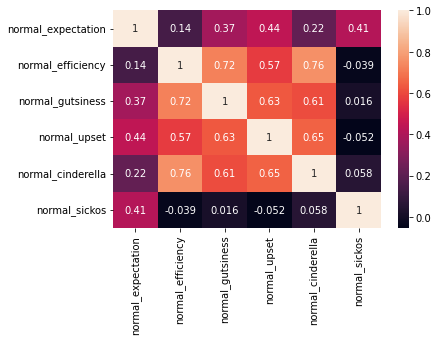

In [16]:
# correlation matrix

c_df = normal_stats_table.iloc[:, 1:]
c = c_df.columns.values
clen = len(c)

stat_corr = pd.DataFrame(np.zeros([clen, clen]), index=c, columns=c)

for i, ci in enumerate(c):
    for j, cj in enumerate(c):
        stat_corr.iloc[i, j] = c_df.iloc[:, i].corr(c_df.iloc[:, j])

display(stat_corr)

import seaborn as sns

sns.heatmap(stat_corr, annot=True)

In [17]:
# PONGKEMON !!!

sse_columns = ['HP', 'ATK','DEF','SPA','SPD','SPE']
header_stats = ['HP', 'ATK','DEF','SPA','SPD','SPE','BST']

pokemon_bst = pd.read_csv('data/pokemon_bst.csv')
pokemon_bst.columns = ['num', 'pokemon'] + header_stats + ['AVG']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pokemon_bst)

,num,pokemon,HP,ATK,DEF,SPA,SPD,SPE,BST,AVG
0,1,Bulbasaur,45,49,49,65,65,45,318,53.00
1,2,Ivysaur,60,62,63,80,80,60,405,67.50
2,3,Venusaur,80,82,83,100,100,80,525,87.50
3,3,Venusaur (Mega Venusaur),80,100,123,122,120,80,625,104.17
4,4,Charmander,39,52,43,60,50,65,309,51.50
5,5,Charmeleon,58,64,58,80,65,80,405,67.50
6,6,Charizard,78,84,78,109,85,100,534,89.00
7,6,Charizard (Mega Charizard X),78,130,111,130,85,100,634,105.67
8,6,Charizard (Mega Charizard Y),78,104,78,159,115,100,634,105.67
9,7,Squirtle,44,48,65,50,64,43,314,52.33


In [18]:
player_pokemon_dict = dict()

pongkemon_table = stats_table.copy()
pongkemon_table.columns = ['player'] + header_stats

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pongkemon_table)

# assigning sums of squared errors for every player and pokemon
for (i, row_player) in pongkemon_table.iterrows():
    
    this_player_all_poke = np.zeros(shape=(pokemon_bst.shape[0], pokemon_bst.shape[1] - 3))
    for (j, row_poke) in pokemon_bst.iterrows():

        diff = - row_player[sse_columns] + row_poke[sse_columns]
        diff['sse'] = ((diff).apply(np.square).sum())
        this_player_all_poke[j] = np.array(diff)

    pp_df = pd.DataFrame(this_player_all_poke, columns=["D_"+x for x in sse_columns] + ['SSE']).astype(int)
    pp_df['pokemon'] = pokemon_bst['pokemon']
    pp_df.index.name = f"{row_player.player} vs. Pokemon SSE"
    pp_df = pp_df.reindex(columns=['pokemon'] + ['D_'+x for x in sse_columns] + ['SSE'])
    player_pokemon_dict.update({row_player.player: pp_df})
    display(pp_df.sort_values('SSE', ascending=True))
# 

,player,HP,ATK,DEF,SPA,SPD,SPE,BST
Stats Table,,,,,,,,
0,Kristian Banlaoi,40,111,60,60,101,78,450
1,Kevin Cooper,71,113,115,69,101,92,561
2,Rohan Chowla,80,114,105,95,105,71,570
3,Rose Roché,62,104,90,60,86,96,498
4,Aaron Carter,75,115,114,105,95,67,571
5,Roman Ramirez,78,117,120,103,103,49,570
6,Coby Lovelace,87,111,108,107,106,91,610
7,Paul Bartenfeld,90,84,60,66,77,116,493
8,Jason Jackson,82,106,90,81,90,106,555


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Kristian Banlaoi vs. Pokemon SSE,,,,,,,,
143,Hitmonlee,10,9,-7,-25,9,9,1017
920,Komala,25,4,5,15,-6,-13,1096
144,Hitmonchan,10,-6,19,-25,9,-2,1207
572,Gallade,28,14,5,5,14,2,1230
31,Arbok,20,-16,9,5,-22,2,1250
...,...,...,...,...,...,...,...,...
944,Guzzlord,183,-10,-7,37,-48,-35,38536
151,Chansey,210,-106,-55,-25,4,-28,59786
305,Blissey,215,-101,-50,15,34,-23,60836


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Kevin Cooper vs. Pokemon SSE,,,,,,,,
718,Klinklang,-11,-13,0,1,-16,-2,551
932,Tapu Bulu,-1,17,0,16,-6,-17,871
816,Barbaracle,1,-8,0,-15,-15,-24,1091
213,Feraligatr,14,-8,-15,10,-18,-14,1105
907,Tsareena,1,7,-17,-19,-3,-20,1109
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-21,67,-95,111,-81,58,36201
272,Shuckle,-51,-103,115,-59,129,-87,54126
305,Blissey,184,-103,-105,6,34,-37,58051


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Rohan Chowla vs. Pokemon SSE,,,,,,,,
584,Mesprit,0,-9,0,10,0,9,262
412,Altaria (Mega Altaria),-5,-4,5,15,0,9,372
929,Kommo-o,-5,-4,20,5,0,14,662
932,Tapu Bulu,-10,16,10,-10,-10,4,672
942,Celesteela,17,-13,-2,12,-4,-10,722
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-30,66,-85,85,-85,79,33172
305,Blissey,175,-104,-95,-20,30,-16,52022
151,Chansey,170,-109,-100,-60,0,-21,54822


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Rose Roché vs. Pokemon SSE,,,,,,,,
1120,Bombirdier,8,-1,-5,0,-1,-14,287
163,Scyther,8,6,-10,-5,-6,9,342
651,Leavanny,13,-1,-10,10,-6,-4,422
382,Medicham (Mega Medicham),-2,-4,-5,20,-1,4,462
654,Scolipede,-2,-4,-1,-5,-17,16,591
...,...,...,...,...,...,...,...,...
944,Guzzlord,161,-3,-37,37,-33,-53,32566
151,Chansey,188,-99,-85,-25,19,-46,55472
305,Blissey,193,-94,-80,15,49,-41,56792


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Aaron Carter vs. Pokemon SSE,,,,,,,,
412,Altaria (Mega Altaria),0,-5,-4,5,10,13,335
584,Mesprit,5,-10,-9,0,10,13,475
929,Kommo-o,0,-5,11,-5,10,18,595
932,Tapu Bulu,-5,15,1,-20,0,8,715
861,Volcanion,5,-5,6,25,-5,3,745
...,...,...,...,...,...,...,...,...
534,Happiny,25,-110,-109,-90,-30,-37,34975
305,Blissey,180,-105,-104,-30,40,-12,56885
272,Shuckle,-55,-105,116,-95,135,-62,58600


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Roman Ramirez vs. Pokemon SSE,,,,,,,,
942,Celesteela,19,-16,-17,4,-2,12,1070
311,Tyranitar,22,17,-10,-8,-3,12,1090
458,Metagross,2,18,10,-8,-13,21,1102
1062,Enamorus (Therian Forme),-4,-2,-10,32,-3,-3,1162
412,Altaria (Mega Altaria),-3,-7,-10,7,2,31,1172
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-28,63,-100,77,-83,101,37772
272,Shuckle,-58,-107,110,-93,127,-44,53627
305,Blissey,177,-107,-110,-28,32,6,56722


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Coby Lovelace vs. Pokemon SSE,,,,,,,,
584,Mesprit,-7,-6,-3,-2,-1,-11,220
412,Altaria (Mega Altaria),-12,-1,2,3,-1,-11,280
601,Victini,13,-11,-8,-7,-6,9,520
929,Kommo-o,-12,-1,17,-7,-1,-6,520
598,Shaymin (Land Forme),13,-11,-8,-7,-6,9,520
...,...,...,...,...,...,...,...,...
534,Happiny,13,-106,-103,-92,-41,-61,35880
305,Blissey,168,-101,-98,-32,29,-36,51190
151,Chansey,163,-106,-103,-72,-1,-41,55280


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Paul Bartenfeld vs. Pokemon SSE,,,,,,,,
1083,Maushold,-16,-9,10,-1,-2,-5,467
789,Talonflame,-12,-3,11,8,-8,10,502
22,Pidgeot,-7,-4,15,4,-7,-15,580
802,Furfrou,-15,-4,0,-1,13,-14,607
690,Cinccino,-15,11,0,-1,-17,-1,637
...,...,...,...,...,...,...,...,...
265,Steelix (Mega Steelix),-15,41,170,-11,18,-86,38647
151,Chansey,160,-79,-55,-31,28,-66,40967
305,Blissey,165,-74,-50,9,58,-61,42367


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Jason Jackson vs. Pokemon SSE,,,,,,,,
407,Flygon,-2,-6,-10,-1,-10,-6,277
194,Zapdos (Galarian Zapdos),8,19,0,4,0,-6,477
651,Leavanny,-7,-3,-10,-11,-10,-14,575
382,Medicham (Mega Medicham),-22,-6,-5,-1,-5,-6,607
917,Silvally,13,-11,5,14,5,-11,657
...,...,...,...,...,...,...,...,...
534,Happiny,18,-101,-85,-66,-25,-76,28507
305,Blissey,173,-96,-80,-6,45,-51,50207
151,Chansey,168,-101,-85,-46,15,-56,51127


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Jack Massingill vs. Pokemon SSE,,,,,,,,
584,Mesprit,-2,-3,4,-5,-2,-17,347
412,Altaria (Mega Altaria),-7,2,9,0,-2,-17,427
315,Celebi,18,-8,-1,-10,-7,3,547
601,Victini,18,-8,-1,-10,-7,3,547
598,Shaymin (Land Forme),18,-8,-1,-10,-7,3,547
...,...,...,...,...,...,...,...,...
534,Happiny,18,-103,-96,-95,-42,-67,35427
305,Blissey,173,-98,-91,-35,28,-42,51587
151,Chansey,168,-103,-96,-75,-2,-47,55887


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Evan Sooklal vs. Pokemon SSE,,,,,,,,
158,Seaking,-6,3,5,-3,-2,-2,87
753,Zweilous,-14,-4,10,-3,-12,-12,609
684,Garbodor,-6,6,22,-8,0,5,645
491,Bibarel,-7,-4,0,-13,-22,1,719
1135,Veluza,4,13,13,10,-17,0,743
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-36,91,-40,112,-62,80,33965
151,Chansey,164,-84,-55,-33,23,-20,38995
305,Blissey,169,-79,-50,7,53,-15,40385


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Leah Baetcke vs. Pokemon SSE,,,,,,,,
754,Hydreigon,1,-1,2,5,-14,-4,243
193,Zapdos,-1,-16,-3,5,-14,-2,491
192,Articuno (Galarian Articuno),-1,-21,-3,5,-4,-7,541
195,Moltres,-1,-6,2,5,-19,-12,571
465,Latios,-11,-16,-8,10,6,8,641
...,...,...,...,...,...,...,...,...
534,Happiny,9,-101,-83,-105,-39,-72,34901
305,Blissey,164,-96,-78,-45,31,-47,47391
151,Chansey,159,-101,-83,-85,1,-52,52301


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Gabe Silverstein vs. Pokemon SSE,,,,,,,,
774,Genesect,-13,12,-2,7,-8,2,434
754,Hydreigon,8,-3,-7,12,-13,1,436
584,Mesprit,-4,-3,8,-8,2,-17,446
473,Jirachi,16,-8,3,-13,-3,3,516
596,Manaphy,16,-8,3,-13,-3,3,516
...,...,...,...,...,...,...,...,...
534,Happiny,16,-103,-92,-98,-38,-67,34866
305,Blissey,171,-98,-87,-38,32,-42,50646
151,Chansey,166,-103,-92,-78,2,-47,54926


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Reagan Fryatt vs. Pokemon SSE,,,,,,,,
598,Shaymin (Land Forme),15,-4,-9,16,3,-8,651
315,Celebi,15,-4,-9,16,3,-8,651
473,Jirachi,15,-4,-9,16,3,-8,651
601,Victini,15,-4,-9,16,3,-8,651
203,Mew,15,-4,-9,16,3,-8,651
...,...,...,...,...,...,...,...,...
534,Happiny,15,-99,-104,-69,-32,-78,32711
305,Blissey,170,-94,-99,-9,38,-53,51871
151,Chansey,165,-99,-104,-49,8,-58,53671


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Carla Betancourt vs. Pokemon SSE,,,,,,,,
596,Manaphy,1,-4,3,-3,-20,-20,835
203,Mew,1,-4,3,-3,-20,-20,835
601,Victini,1,-4,3,-3,-20,-20,835
598,Shaymin (Land Forme),1,-4,3,-3,-20,-20,835
315,Celebi,1,-4,3,-3,-20,-20,835
...,...,...,...,...,...,...,...,...
889,Wishiwashi (Solo Form),-54,-84,-77,-78,-95,-80,37410
305,Blissey,156,-94,-87,-28,15,-65,45975
151,Chansey,151,-99,-92,-68,-15,-70,50815


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Levin Lee vs. Pokemon SSE,,,,,,,,
926,Dhelmise,-9,11,-9,-17,-17,0,861
1062,Enamorus (Therian Forme),-5,-5,1,32,-7,6,1160
311,Tyranitar,21,14,1,-8,-7,21,1192
942,Celesteela,18,-19,-6,4,-6,21,1214
557,Abomasnow (Mega Abomasnow),11,12,-4,29,-2,-10,1226
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-29,60,-89,77,-87,110,37960
305,Blissey,176,-110,-99,-28,28,15,54670
272,Shuckle,-59,-110,121,-93,123,-35,55225


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Cason Duszak vs. Pokemon SSE,,,,,,,,
407,Flygon,-5,-6,-5,10,-15,0,411
651,Leavanny,-10,-3,-5,0,-15,-8,423
194,Zapdos (Galarian Zapdos),5,19,5,15,-5,0,661
758,Terrakion,6,23,5,2,-5,8,683
163,Scyther,-15,4,-5,-15,-15,5,741
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-35,74,-65,110,-75,50,31151
305,Blissey,170,-96,-75,5,40,-45,47391
151,Chansey,165,-101,-80,-35,10,-50,47651


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Will Simpson vs. Pokemon SSE,,,,,,,,
473,Jirachi,13,-8,3,-1,-4,3,268
601,Victini,13,-8,3,-1,-4,3,268
598,Shaymin (Land Forme),13,-8,3,-1,-4,3,268
596,Manaphy,13,-8,3,-1,-4,3,268
315,Celebi,13,-8,3,-1,-4,3,268
...,...,...,...,...,...,...,...,...
534,Happiny,13,-103,-92,-86,-39,-67,32648
305,Blissey,168,-98,-87,-26,31,-42,48798
151,Chansey,163,-103,-92,-66,1,-47,52208


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Ann Hall vs. Pokemon SSE,,,,,,,,
315,Celebi,6,-8,-8,-1,13,11,455
596,Manaphy,6,-8,-8,-1,13,11,455
598,Shaymin (Land Forme),6,-8,-8,-1,13,11,455
601,Victini,6,-8,-8,-1,13,11,455
203,Mew,6,-8,-8,-1,13,11,455
...,...,...,...,...,...,...,...,...
534,Happiny,6,-103,-103,-86,-22,-59,32615
305,Blissey,161,-98,-98,-26,48,-34,49265
151,Chansey,156,-103,-103,-66,18,-39,51755


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Helen Dunn vs. Pokemon SSE,,,,,,,,
1010,Obstagoon,8,-5,4,-8,-9,-5,275
407,Flygon,-5,5,-17,12,-10,0,583
980,Dubwool,-13,-15,3,-8,0,-12,611
651,Leavanny,-10,8,-17,2,-10,-8,621
548,Drapion,-15,-5,13,-8,-15,-5,733
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-35,85,-77,112,-70,50,34323
151,Chansey,165,-90,-92,-33,15,-50,47603
305,Blissey,170,-85,-87,7,45,-45,47793


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Noah Dale vs. Pokemon SSE,,,,,,,,
1010,Obstagoon,8,-5,4,-8,-9,-5,275
407,Flygon,-5,5,-17,12,-10,0,583
980,Dubwool,-13,-15,3,-8,0,-12,611
651,Leavanny,-10,8,-17,2,-10,-8,621
548,Drapion,-15,-5,13,-8,-15,-5,733
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-35,85,-77,112,-70,50,34323
151,Chansey,165,-90,-92,-33,15,-50,47603
305,Blissey,170,-85,-87,7,45,-45,47793


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Yvonne Nguyen vs. Pokemon SSE,,,,,,,,
1046,Zarude,5,14,1,-4,4,-3,263
854,Zygarde (50% Forme),8,-6,17,7,4,-13,623
154,Kangaskhan (Mega Kangaskhan),5,19,-4,-14,9,-8,743
1010,Obstagoon,-7,-16,-3,-14,-10,-13,779
758,Terrakion,-9,23,-14,-2,-1,0,811
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-50,74,-84,106,-71,42,33073
305,Blissey,155,-96,-94,1,44,-53,46823
151,Chansey,150,-101,-99,-39,14,-58,47583


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Anna Brown vs. Pokemon SSE,,,,,,,,
213,Feraligatr,8,3,3,4,-12,-11,363
293,Kingdra,-2,-7,-2,20,0,-4,473
651,Leavanny,-2,1,-17,-5,-15,3,553
1120,Bombirdier,-7,1,-12,-15,-10,-7,568
206,Meganium,3,-20,3,8,5,-9,588
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-27,78,-77,105,-75,61,33113
305,Blissey,178,-92,-87,0,40,-34,50473
151,Chansey,173,-97,-92,-40,10,-39,51023


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Brian Tafazoli vs. Pokemon SSE,,,,,,,,
158,Seaking,0,8,5,-3,-6,9,215
753,Zweilous,-8,1,10,-3,-16,-1,431
310,Pupitar,-10,0,10,-3,-16,-8,529
325,Marshtomp,-10,1,10,-8,-16,-9,602
863,Dartrix,-2,-9,15,2,-16,-7,619
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-30,96,-40,112,-66,91,36897
151,Chansey,170,-79,-55,-33,19,-9,39697
305,Blissey,175,-74,-50,7,49,-4,41067


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Sam Carswell-Tellis vs. Pokemon SSE,,,,,,,,
381,Medicham,0,0,15,0,0,2,229
603,Servine,0,0,15,0,0,5,250
1116,Tinkatuff,5,-5,-5,-15,7,0,349
179,Eevee (Partner Eevee),5,15,10,5,10,-3,484
429,Castform,10,10,10,10,-5,-8,489
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-10,120,-40,120,-55,72,38709
151,Chansey,190,-55,-55,-25,30,-28,44459
305,Blissey,195,-50,-50,15,60,-23,47379


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Nathan Snow vs. Pokemon SSE,,,,,,,,
1046,Zarude,18,8,8,-2,-12,-1,601
758,Terrakion,4,17,-7,0,-17,2,647
194,Zapdos (Galarian Zapdos),3,13,-7,13,-17,-6,721
154,Kangaskhan (Mega Kangaskhan),18,13,3,-12,-7,-6,731
917,Silvally,8,-17,-2,23,-12,-11,1151
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-37,68,-77,108,-87,44,33091
305,Blissey,168,-102,-87,3,28,-51,49591
151,Chansey,163,-107,-92,-37,-2,-56,50991


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Piper Parker vs. Pokemon SSE,,,,,,,,
572,Gallade,-5,20,5,3,16,-5,740
920,Komala,-8,10,5,13,-4,-20,774
31,Arbok,-13,-10,9,3,-20,-5,784
1095,Ceruledge,2,20,20,-2,1,0,809
1120,Bombirdier,-3,-2,25,-2,-14,-3,847
...,...,...,...,...,...,...,...,...
265,Steelix (Mega Steelix),2,20,170,-7,-4,-55,32394
151,Chansey,177,-100,-55,-27,6,-35,46344
305,Blissey,182,-95,-50,13,36,-30,47014


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Matthew Rusten vs. Pokemon SSE,,,,,,,,
703,Sawsbuck,5,8,10,-2,-1,-5,219
29,Fearow,-10,-2,5,-1,-10,0,230
75,Primeape,-10,13,0,-2,-1,-5,299
962,Raboot,-10,-6,0,-7,-11,-6,342
517,Ambipom,0,8,6,-2,-5,15,354
...,...,...,...,...,...,...,...,...
265,Steelix (Mega Steelix),0,33,170,-7,24,-70,35514
151,Chansey,175,-87,-55,-27,34,-50,45604
305,Blissey,180,-82,-50,13,64,-45,47914


,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
Cassie Deering vs. Pokemon SSE,,,,,,,,
429,Castform,-1,-5,10,10,-4,3,251
951,Poipole,-4,-2,7,13,-7,6,323
753,Zweilous,1,10,10,5,-4,-9,323
198,Dragonair,-10,9,5,10,-4,3,331
179,Eevee (Partner Eevee),-6,0,10,5,11,8,346
...,...,...,...,...,...,...,...,...
475,Deoxys (Attack Forme),-21,105,-40,120,-54,83,37271
151,Chansey,179,-70,-55,-25,31,-17,41841
305,Blissey,184,-65,-50,15,61,-12,44671


In [19]:
best_pokemon_table = pd.DataFrame(columns=player_pokemon_dict['Roman Ramirez'].columns)
best_pokemon_table.index.name = "Best Pokemon Match"

for (i, row) in pongkemon_table.iterrows(): 
    best_pokemon_table.loc[i] = player_pokemon_dict[row.player].sort_values('SSE', ascending=True).reset_index(drop=True).iloc[0]
# display(pongkemon_table)
# display(best_pokemon_table)

total_pokemon_table = pd.concat([pongkemon_table, best_pokemon_table], axis=1).reset_index(drop=True)
sum_sse = total_pokemon_table.SSE.sum()
display(total_pokemon_table.sort_values('SSE', ascending=True))
display(sum_sse)

# 40-120's SSE: 17238
# 60-120's SSE: 15360

,player,HP,ATK,DEF,SPA,SPD,SPE,BST,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
10,Evan Sooklal,86,89,60,68,82,70,455,Seaking,-6,3,5,-3,-2,-2,87
23,Brian Tafazoli,80,84,60,68,86,59,437,Seaking,0,8,5,-3,-6,9,215
27,Matthew Rusten,75,92,60,62,71,100,460,Sawsbuck,5,8,10,-2,-1,-5,219
6,Coby Lovelace,87,111,108,107,106,91,610,Mesprit,-7,-6,-3,-2,-1,-11,220
24,Sam Carswell-Tellis,60,60,60,60,75,78,393,Medicham,0,0,15,0,0,2,229
11,Leah Baetcke,91,106,88,120,104,102,611,Hydreigon,1,-1,2,5,-14,-4,243
28,Cassie Deering,71,75,60,60,74,67,407,Castform,-1,-5,10,10,-4,3,251
2,Rohan Chowla,80,114,105,95,105,71,570,Mesprit,0,-9,0,10,0,9,262
21,Yvonne Nguyen,100,106,104,74,91,108,583,Zarude,5,14,1,-4,4,-3,263
17,Will Simpson,87,108,97,101,104,97,594,Jirachi,13,-8,3,-1,-4,3,268


12509

In [20]:
best_pokemon_table['D_HP'].mean()

best_pokemon_table.iloc[:,1:].mean()

D_HP       1.655172
D_ATK     -0.620690
D_DEF      0.448276
D_SPA     -0.379310
D_SPD     -3.862069
D_SPE     -1.758621
SSE      431.344828
dtype: float64

In [21]:
### matches tables
# matches_1s
# matches_2s
# matches_table

### players tables
# players
# cups_table
# wl_table
# fa_table, remove: GP
# hcs_table
# str_table, remove: PTS, expectation, cinderella
# sickos_table, remove: +/-, W_PCT, sickos, guisiness
# upset_table, remove: total_upset
# raw_stats_table
# stats_table
# best_pokemon_table: remove: HP, ATK, DEF, SPA, SPD, SPE, BST

In [22]:
# export matches table
export(matches_table, 'matches_table')

In [23]:
# player pokemon table matches
# export whole dictionary
for (key, value) in player_pokemon_dict.items():
    export(value, f"player_pokemon_sse/pkmn_sse_{key.replace(' ', '_')}")

In [24]:
# merge
list_players_tables = list()
list_players_tables.append(players.iloc[:,[x not in [''] for x in players.columns]])
# list_players_tables.append(cups_table.iloc[:,[x not in ['player'] for x in cups_table.columns]])
list_players_tables.append(wl_table.iloc[:,[x not in ['player'] for x in wl_table.columns]])
list_players_tables.append(fa_table.iloc[:,[x not in ['player', 'GP'] for x in fa_table.columns]])
list_players_tables.append(hcs_table.iloc[:,[x not in ['player'] for x in hcs_table.columns]])
list_players_tables.append(str_table.iloc[:,[x not in ['player', 'PTS', 'expectation', 'cinderella'] for x in str_table.columns]])
list_players_tables.append(sickos_table.iloc[:,[x not in ['player', '+/-', 'W_PCT', 'sickos', 'gutsiness'] for x in sickos_table.columns]])
list_players_tables.append(upset_table.iloc[:,[x not in ['player'] for x in upset_table.columns]])
list_players_tables.append(raw_stats_table.iloc[:,[x not in ['player'] for x in raw_stats_table.columns]])
list_players_tables.append(normal_stats_table.iloc[:,[x not in ['player'] for x in normal_stats_table.columns]])
list_players_tables.append(stats_table.iloc[:,[x not in ['player'] for x in stats_table.columns]])
list_players_tables.append(best_pokemon_table.iloc[:,[x not in ['player', 'HP', 'ATK', 'DEF', 'SPA', 'SPD', 'SPE', 'BST'] for x in best_pokemon_table.columns]])

players_table =  pd.concat(list_players_tables, join='outer', axis=1).fillna(np.NaN)
players_table = players_table.sort_values('player', ascending=True).reset_index(drop=True)

# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['DATE'], how='outer'), data_frames)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(players_table)

# export players table
export(players_table, 'players_table', index=False)

,player,year_2023,seed_2021_2s,seed_2022_1s,seed_2022_2s,seed_2023_1s,num_events,z_seed_2021_2,z_seed_2022_1,z_seed_2022_2,z_seed_2023_1,avg_norm_seed,year_2023,W_1s,UW_1s,EW_1s,L_1s,UL_1s,EL_1s,RL_1s,URL_1s,ERL_1s,W_2s,UW_2s,EW_2s,L_2s,UL_2s,EL_2s,RL_2s,URL_2s,ERL_2s,UW,EW,UL,EL,URL,ERL,GP,UGP,EGP,ODW,ODL,ODRL,UDW,UDL,UDRL,W,L,RL,PTS,PTS/EV,W_PCT,UW_PCT,EW_PCT,GP_1s,PF_1s,PA_1s,CA_1s,+/-_1s,GP_2s,PF_2s,PA_2s,CA_2s,+/-_2s,PF,PA,CA,+/-,PF/G,PA/G,CA/G,+/-/G,PF/PA,PF/CA,(+/-)/CA,hcs_1s,hcs_2s,hcs,hcs/event,total_seeds_1s,total_seeds_2s,total_seeds,avg_norm_total_seeds_1s,avg_norm_total_seeds_2s,SOV_1s,SOV_2s,SOS,SOV,z_SOS,z_SOV,z_PTS,z_PTS/EV,avg_norm_seed,PTS/EV,n_avg_norm_seed,n_PTS/EV,z_+/-,z_W_PCT,sickos_resids,EW,EL,EGP,raw_poll_scores,GP,W,total_upset,avg_upset,total_upset/GP,total_upset/W,raw_expectation,raw_efficiency,raw_gutsiness,raw_upset,raw_cinderella,raw_sickos,normal_expectation,normal_efficiency,normal_gutsiness,normal_upset,normal_cinderella,normal_sickos,expectation,efficiency,gutsiness,upset,cinderella,sickos,BST,pokemon,D_HP,D_ATK,D_DEF,D_SPA,D_SPD,D_SPE,SSE
0,Aaron Carter,4.0,1.0,5.0,3.0,8.0,4,-1.479020,-0.670820,-0.752773,-0.355409,-0.814506,4.0,8,2,6,3,2,1,0,0,0,3,1,2,4,2,2,0,0,0,3,8,4,3,0,0,18,7,11,7,7,0,4,0,0,11,7,0,14,3.500000,61.111111,42.857143,72.727273,11,65,52,72,13,7,38,38,45,0,103,90,117,13,5.722222,5.000000,6.500000,0.722222,114.444444,88.034188,0.111111,13,8,21,5.250000,94,44,138,0.502674,0.785714,56.105684,21.944444,0.355806,0.390251,-0.941715,0.479893,1.009395,0.252349,-0.814506,3.500000,-0.520369,0.500000,1.491202,0.222222,-1.177823,8,3,11,4.0,18,11,3.742857,0.415873,0.207937,0.340260,-0.272820,0.111111,0.454545,3.742857,1.138216,-1.177823,0.575734,0.902655,0.888889,0.734694,0.569108,0.329530,75,115,114,105,95,67,571,Altaria (Mega Altaria),0,-5,-4,5,10,13,335
1,Ann Hall,4.0,7.0,NaN,7.0,16.0,3,1.056443,NaN,0.752773,1.066228,0.958481,4.0,3,0,3,2,1,1,0,0,0,1,0,1,3,2,1,1,0,1,0,4,3,2,0,1,10,3,7,0,2,0,4,3,1,4,5,1,5,1.666667,40.000000,0.000000,57.142857,5,26,21,30,5,5,26,31,33,-5,52,52,63,0,5.200000,5.200000,6.300000,0.000000,100.000000,82.539683,0.000000,5,6,11,3.666667,73,15,88,0.858824,0.375000,22.222222,20.833333,0.383088,0.215278,-0.707275,-0.464352,-0.294823,-0.098274,0.958481,1.666667,0.612351,0.238095,0.000000,-0.200000,0.013579,4,2,7,7.0,10,4,3.468254,0.385362,0.346825,0.867063,0.515946,0.000000,0.285714,3.468254,0.883998,0.013579,0.890469,0.796460,0.785714,0.680791,0.441999,0.611609,94,108,108,101,87,89,587,Celebi,6,-8,-8,-1,13,11,455
2,Anna Brown,NaN,7.0,NaN,NaN,NaN,1,1.056443,NaN,NaN,NaN,1.056443,NaN,0,0,0,0,0,0,0,0,0,1,0,1,2,1,1,0,0,0,0,1,1,1,0,0,3,1,2,0,0,0,1,2,0,1,2,0,1,1.000000,33.333333,0.000000,50.000000,0,0,0,0,0,3,14,16,18,-2,14,16,18,-2,4.666667,5.333333,6.000000,-0.666667,87.500000,77.777778,-0.111111,0,3,3,3.000000,0,10,10,NaN,0.416667,NaN,20.833333,0.583333,0.208333,1.013459,-0.501828,-0.874475,-0.874475,1.056443,1.000000,0.674937,0.142857,-0.229416,-0.333333,-0.017256,1,1,2,0.0,3,1,1.238095,0.309524,0.412698,1.238095,-0.182907,-0.111111,0.000000,1.238095,1.146953,-0.017256,0.611612,0.690265,0.611111,0.243029,0.573477,0.604309,77,102,97,75,95,89,535,Feraligatr,8,3,3,4,-12,-11,363
3,Brian Tafazoli,2.0,8.0,NaN,NaN,NaN,1,1.479020,NaN,NaN,NaN,1.479020,2.0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,0,0,1,1,0,0,2,1,1,0,0,0,0,2,0,0,2,0,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,2,7,12,12,-5,7,12,12,-5,3.500000,6.000000,6.000000,-2.500000,58.333333,58.333333,-0.416667,0,2,2,2.000000,0,6,6,NaN,0.375000,NaN,NaN,0.625000,0.000000,1.371506,-1.626104,-1.019389,-1.019389,1.479020,0.000000,0.944911,0.000000,-0.573539,-1.000000,-1.602660,0,1,1,0.0,2,0,0.595238,0.198413,0.297619,inf,-0.055089,-0.416667,-1.000000,0.595238,0.856855,-1.602660,0.662614,0.398230,0.000000,0.116841,0.428427,0.228945,80,84,60,68,86,59,437,Seaking,0,8,5,-3,-6,9,215
4,Carla Betancourt,4.0,NaN,15.0,NaN,NaN,1,NaN,1.565248,NaN,NaN,1.565248,4.0,3,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,5,3,2,0,0,0,3,2,0,3,2,0,5,5.00000